In [6]:
import torch

tensor = torch.load(f"./../final_embeddings/ankh_merged_tensor.pt", map_location=torch.device('cpu'))

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors


def estimate_intrinsic_dimension(data, nn=3, plot=True):
    knn = NearestNeighbors(n_neighbors=nn).fit(data)
    distances, _ = knn.kneighbors(data)

    r1 = distances[:, 1]  # First nearest neighbor
    r2 = distances[:, 2]

    ratios = r2 / r1
    
    # Log-log cumulative density function (CDF)
    sorted_ratios = np.sort(ratios)
    cdf = np.arange(1, len(sorted_ratios) + 1) / len(sorted_ratios)
    
    if plot:
        plt.figure(figsize=(8, 6))
        plt.plot(np.log(sorted_ratios), np.log(cdf), 'o-', label='Log-Log CDF')
        plt.xlabel('log(R)')
        plt.ylabel('log(CDF)')
        plt.title('2NN Method: Intrinsic Dimension Estimation')
        plt.grid(True)
        plt.legend()
        plt.show()
    
    # Estimate slope (linear region)
    linear_region = slice(len(sorted_ratios) // 4, 3 * len(sorted_ratios) // 4)  # Adjust as needed
    log_ratios = np.log(sorted_ratios[linear_region])
    log_cdf = np.log(cdf[linear_region])
    
    slope, _ = np.polyfit(log_ratios, log_cdf, 1)
    
    return slope



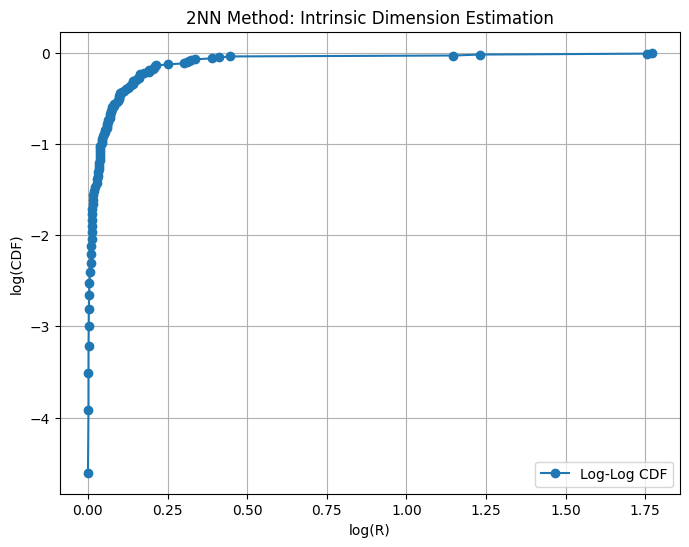

7.897177057159072

In [11]:
estimate_intrinsic_dimension(tensor[:100, 10, :])